In [1]:
'''
--------------------------------------------------------------------------------
単語ベクトルの学習済みモデルをダウンロード（6分ぐらい）
--------------------------------------------------------------------------------
'''
!pip install gensim

import gensim.downloader as api
# w2v = api.load("glove-wiki-gigaword-50") # https://github.com/RaRe-Technologies/gensim-data
w2v = api.load("word2vec-google-news-300") # https://github.com/RaRe-Technologies/gensim-data

[================================================--] 98.0% 1628.8/1662.8MB downloaded


In [2]:
'''
--------------------------------------------------------------------------------
単語ベクトルの中身を確認
--------------------------------------------------------------------------------
'''
print("語彙サイズ：%d" % len(w2v.vocab))
for word in list(w2v.vocab)[:30]:
    print(word)
print()
print("次元数：%d" % w2v.vector_size)
print(w2v["dog"])

語彙サイズ：3000000
</s>
in
for
that
is
on
##
The
with
said
was
the
at
not
as
it
be
from
by
are
I
have
he
will
has
####
his
an
this
or

次元数：300
[ 5.12695312e-02 -2.23388672e-02 -1.72851562e-01  1.61132812e-01
 -8.44726562e-02  5.73730469e-02  5.85937500e-02 -8.25195312e-02
 -1.53808594e-02 -6.34765625e-02  1.79687500e-01 -4.23828125e-01
 -2.25830078e-02 -1.66015625e-01 -2.51464844e-02  1.07421875e-01
 -1.99218750e-01  1.59179688e-01 -1.87500000e-01 -1.20117188e-01
  1.55273438e-01 -9.91210938e-02  1.42578125e-01 -1.64062500e-01
 -8.93554688e-02  2.00195312e-01 -1.49414062e-01  3.20312500e-01
  3.28125000e-01  2.44140625e-02 -9.71679688e-02 -8.20312500e-02
 -3.63769531e-02 -8.59375000e-02 -9.86328125e-02  7.78198242e-03
 -1.34277344e-02  5.27343750e-02  1.48437500e-01  3.33984375e-01
  1.66015625e-02 -2.12890625e-01 -1.50756836e-02  5.24902344e-02
 -1.07421875e-01 -8.88671875e-02  2.49023438e-01 -7.03125000e-02
 -1.59912109e-02  7.56835938e-02 -7.03125000e-02  1.19140625e-01
  2.29492188e-01 

In [10]:
'''
--------------------------------------------------------------------------------
単語間の類似度 （dogとcatの類似度）
--------------------------------------------------------------------------------
'''
print("cos(dog, cat) = %1.3f" % w2v.similarity("dog", "cat"))
print("cos(dog, book) = %1.3f" % w2v.similarity("dog", "book"))

cos(dog, cat) = 0.761
cos(dog, book) = 0.086


In [4]:
'''
--------------------------------------------------------------------------------
類似単語の検索 （dogの類似単語上位10件）
--------------------------------------------------------------------------------
'''
w2v.most_similar("dog", topn=10)

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.780396044254303),
 ('pooch', 0.7627377510070801),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500902414321899),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437614798545837),
 ('beagle', 0.7418621778488159),
 ('pup', 0.740691065788269)]

In [5]:
'''
--------------------------------------------------------------------------------
単語の類推 (king - man + woman = queen)
--------------------------------------------------------------------------------
'''
w2v.most_similar(positive=["king", "woman"], negative=["man"], topn=10)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

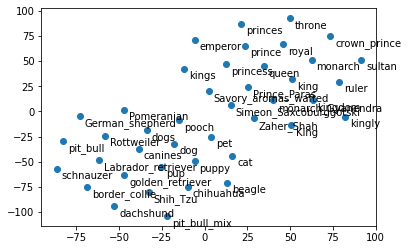

In [6]:
'''
--------------------------------------------------------------------------------
単語ベクトルの可視化
--------------------------------------------------------------------------------
'''
!pip install numpy
!pip install sklearn
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# dog と king の類似単語を20ずつ集めてベクトル化
w1, w2 = "dog", "king"
words = [w1, w2]
words += [word for word, similarity in w2v.most_similar(w1, topn=20)]
words += [word for word, similarity in w2v.most_similar(w2, topn=20)]
vectors = np.vstack([w2v[word] for word in words])

# 300次元のベクトルを2次元に変換
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vectors)
coordinates_x = Y[:, 0]
coordinates_y = Y[:, 1]
plt.scatter(coordinates_x, coordinates_y)

for word, x, y in zip(words, coordinates_x, coordinates_y):
    plt.annotate(word, xy=(x, y), xytext=(5, -10), textcoords="offset points")

plt.show()

In [7]:
'''
--------------------------------------------------------------------------------
単語ベクトルに基づく文の類似度推定 （準備）
--------------------------------------------------------------------------------
'''

# 英語用の形態素解析器
import nltk
nltk.download('punkt')

# 自動評価指標
from scipy.stats import pearsonr

# データセット
!wget http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz
!tar zxvf Stsbenchmark.tar.gz
!head stsbenchmark/sts-test.csv

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2021-01-09 04:50:55--  http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz
Resolving ixa2.si.ehu.es (ixa2.si.ehu.es)... 158.227.106.100
Connecting to ixa2.si.ehu.es (ixa2.si.ehu.es)|158.227.106.100|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://ixa2.si.ehu.eus/stswiki/images/4/48/Stsbenchmark.tar.gz [following]
--2021-01-09 04:50:56--  http://ixa2.si.ehu.eus/stswiki/images/4/48/Stsbenchmark.tar.gz
Resolving ixa2.si.ehu.eus (ixa2.si.ehu.eus)... 158.227.106.100
Connecting to ixa2.si.ehu.eus (ixa2.si.ehu.eus)|158.227.106.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409630 (400K) [application/x-gzip]
Saving to: ‘Stsbenchmark.tar.gz.1’

Stsbenchmark.tar.gz 100%[===================>] 400.03K   390KB/s    in 1.0s    

2021-01-09 04:50:57 (390 KB/s) - ‘Stsbenchmark.tar.gz.1’ saved [409630/409630]

stsben

In [12]:
'''
--------------------------------------------------------------------------------
単語ベクトルに基づく文の類似度推定 （前処理）
--------------------------------------------------------------------------------
'''

vocab = set(w2v.vocab.keys())

# 単語分割と未知語処理
def tokenizer(sentence, vocab):
    word_list = list()
    for word in nltk.word_tokenize(sentence):
        if word in vocab:
            word_list.append(word)
    return word_list

data = list()
file = open("stsbenchmark/sts-test.csv", "r")
for line in file:
    # 必要なデータの抽出
    gold_score = float(line.split("\t")[4].strip())
    sentence1 = line.split("\t")[5].strip().lower()
    sentence2 = line.split("\t")[6].strip().lower()
    # 単語分割と未知語処理
    sentence1 = tokenizer(sentence1, vocab)
    sentence2 = tokenizer(sentence2, vocab)
    data.append((sentence1, sentence2, gold_score))
file.close()

In [14]:
'''
--------------------------------------------------------------------------------
単語ベクトルに基づく文の類似度推定
--------------------------------------------------------------------------------
'''

import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos(vector1, vector2):
    return dot(vector1, vector2) / (norm(vector1) * norm(vector2))

def vectorize(word_list, w2v):
    vector_list = list()
    for word in word_list:
        vector_list.append(w2v[word].tolist())
    return np.array(vector_list).mean(axis=0)
    # return np.median(np.array(vector_list), axis=0)  # 0.512 - edit by K.Harada

gold, pred = list(), list()
for word_list1, word_list2, gold_score in data:
    vector1 = vectorize(word_list1, w2v)
    vector2 = vectorize(word_list2, w2v)
    gold.append(gold_score)
    pred.append(cos(vector1, vector2))

print("人手評価との相関係数 = %1.3f" % pearsonr(gold, pred)[0])

人手評価との相関係数 = 0.512
